In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [19]:
def PlotHistoByUncertainty(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [20]:
def PlotHistoByExp(topic, sExp):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Exponent'].isin(sExp.keys())].set_index('Exponent')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sExp)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [21]:
def PlotHistoByX(topic, sX):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Value'].isin(sX.keys())].set_index('Input Value')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sX)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [22]:
def PlotCompare(topic, leftLegend=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

In [71]:
def PlotEdge(topic, xLabel, leftLegend=(1.1,1), rightLegend=(1.1,0.1), sigma=0, xlim=[], ylog=False):
    fig, ax = plt.subplots()
    ax.set_title(f'{topic}')
    ax.set_xlabel(xLabel)
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel(r'Upper Bound $\delta x$')
    ax.grid(True)
    ax.plot(df['Edge Value'], df['Edge Uncertainty'], f'k-', label=r'Upper Bound $\delta x$')
    if sigma:
            ax.plot(df['Edge Value'], df['Edge Value']/sigma, f'k--', label=r'$\delta x = x/5$')

    ax2 = ax.twinx()
    if ylog:
        ax2.set_yscale('log')
    ax2.set_ylabel('Upper Bound Bias and Uncertainty')
    ax2.plot(df['Edge Value'], df['Bias'], c='gray', ls='--', label='Upper Bound Uncertainty Bias')
    ax2.plot(df['Edge Value'], df['Uncertainty'], c='gray', ls='-', label='Upper Bound Uncertainty')

    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

## Power

In [89]:
df = pd.read_csv("../Python/Output/PowAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.00,0.19806,0.404866,91.408378,NotMonotonicException: (1.000000e+00~1.981e-01...
1,-2.95,0.19811,0.384506,77.799103,NotMonotonicException: (1.000000e+00~1.981e-01...
2,-2.90,0.19816,0.365535,66.162022,NotMonotonicException: (1.000000e+00~1.982e-01...
3,-2.85,0.19821,0.347806,56.219171,NotMonotonicException: (1.000000e+00~1.982e-01...
4,-2.80,0.19826,0.331190,47.730696,NotMonotonicException: (1.000000e+00~1.983e-01...


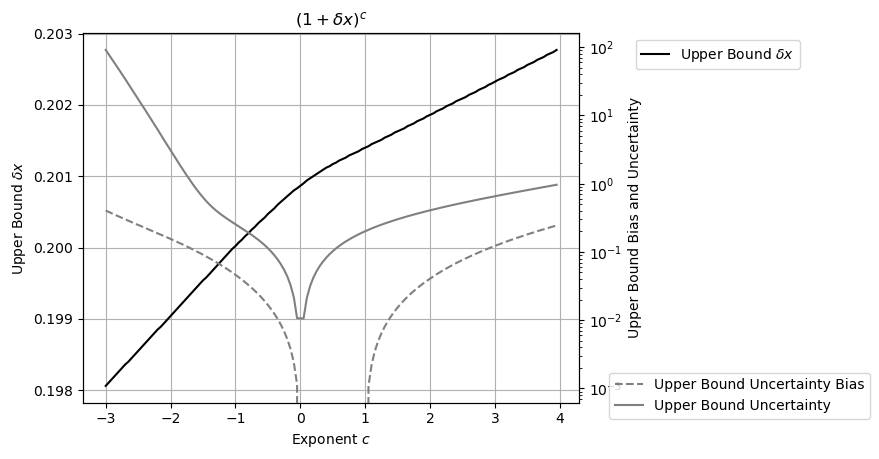

In [90]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', rightLegend=(1.6,0.1), ylog=True)

In [143]:
df = pd.read_csv("../Java/Output/PowEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.00,0.19807,0.405207,91.81435,Type.NotMonotonicException
1,-2.99,0.19808,0.401007,88.90693,Type.NotMonotonicException
2,-2.98,0.19809,0.396867,86.08879,Type.NotMonotonicException
3,-2.97,0.19810,0.392787,83.35728,Type.NotMonotonicException
4,-2.96,0.19811,0.388766,80.70982,Type.NotMonotonicException


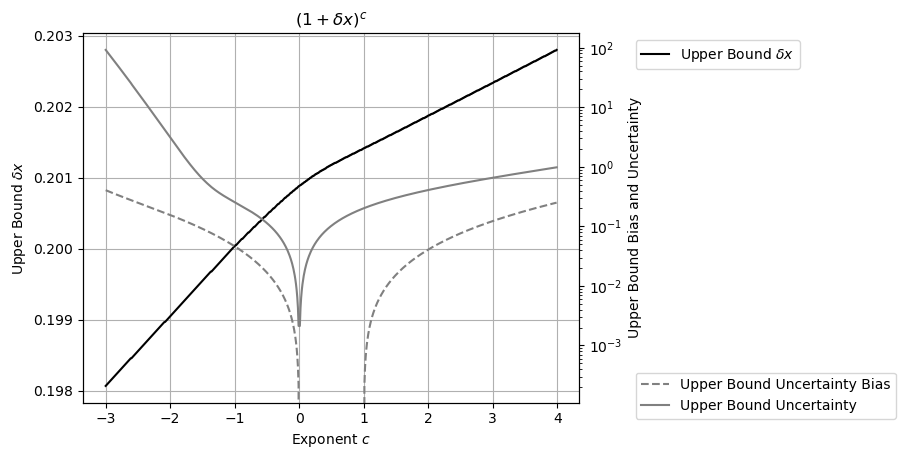

In [144]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', ylog=True)

In [183]:
df = pd.read_csv("../Cpp/Output/PowEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.0,0.19807,1.54633,91.8144,NotMonotonicException
1,-2.9,0.19817,1.60504,66.4546,NotMonotonicException
2,-2.8,0.19827,1.66637,47.9407,NotMonotonicException
3,-2.7,0.19837,1.72838,34.4684,NotMonotonicException
4,-2.6,0.19846,1.78925,24.5115,NotMonotonicException


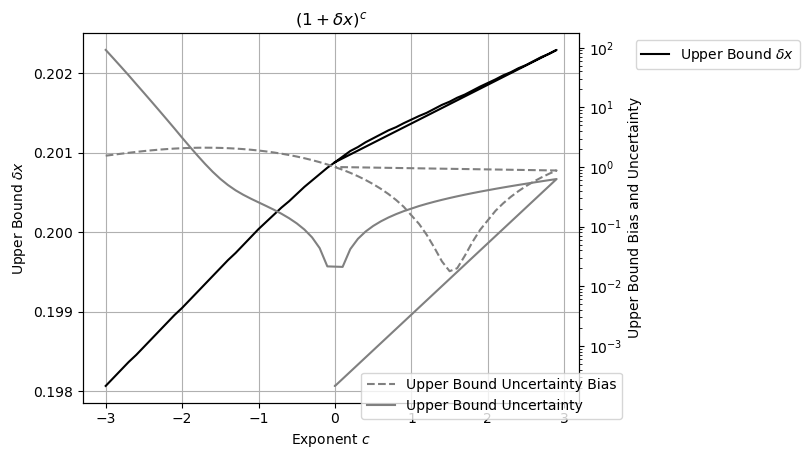

In [184]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', ylog=True)

## Log

In [91]:
df = pd.read_csv("../Python/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,0.0625,0.0125,-0.021410,0.212005,NotMonotonicException: log(6.250000e-02~1.260e...
1,0.1250,0.0251,-0.021595,0.212977,NotMonotonicException: log(1.250000e-01~2.520e...
2,0.1875,0.0376,-0.021533,0.212653,NotMonotonicException: log(1.875000e-01~3.770e...
3,0.2500,0.0502,-0.021595,0.212977,NotMonotonicException: log(2.500000e-01~5.030e...
4,0.3125,0.0627,-0.021558,0.212782,NotMonotonicException: log(3.125000e-01~6.280e...


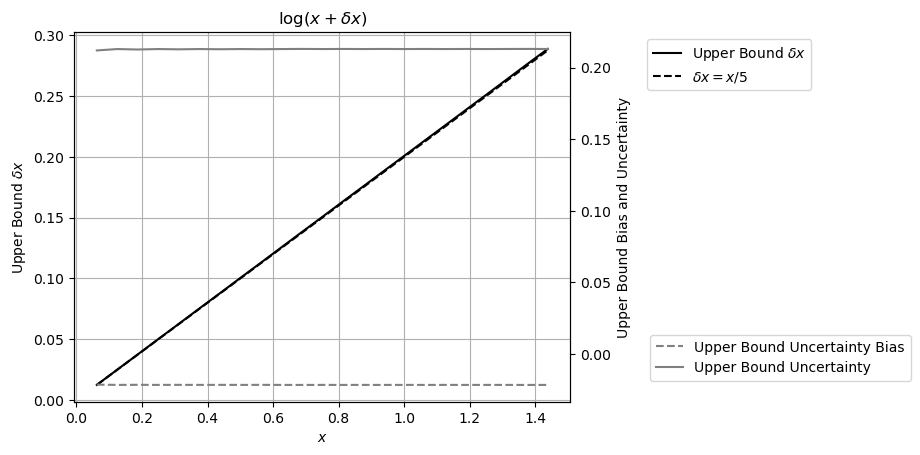

In [92]:
PlotEdge(topic=r'$\log(x + \delta x)$', xLabel=r'$x$', 
         leftLegend=(1.5,1), rightLegend=(1.7,0.2), sigma=5)

In [36]:
df[['Bias', 'Uncertainty']].describe()

,Bias,Uncertainty
count,23.000000,23.000000
mean,-0.021721,0.213634
std,0.000079,0.000414
min,-0.021766,0.212004
25%,-0.021760,0.213649
50%,-0.021751,0.213788
75%,-0.021724,0.213839
max,-0.021410,0.213866


In [100]:
df = pd.read_csv("../Java/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,0.0625,0.012,-0.019610,0.202418,Type.NotMonotonicException
1,0.1250,0.024,-0.019610,0.202418,Type.NotFiniteException
2,0.1875,0.037,-0.020799,0.208786,Type.NotMonotonicException
3,0.2500,0.049,-0.020498,0.207186,Type.NotFiniteException
4,0.3125,0.061,-0.020318,0.206228,Type.NotFiniteException


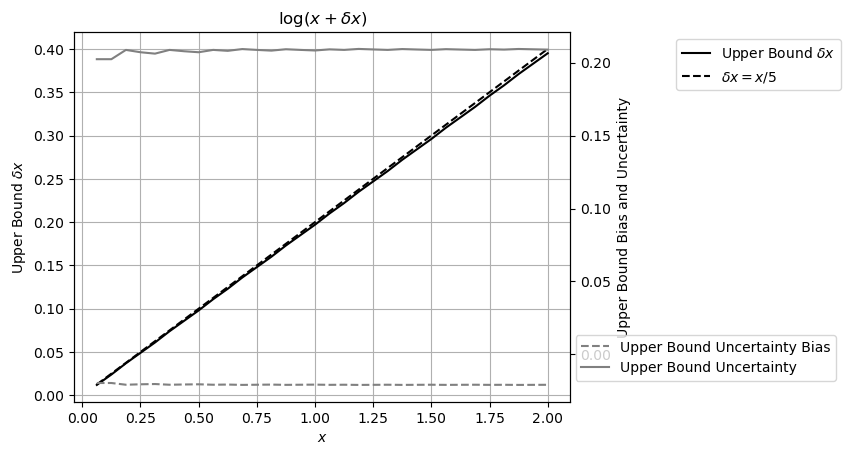

In [101]:
PlotEdge(topic=r'$\log(x + \delta x)$', xLabel=r'$x$', leftLegend=(1.2,1), rightLegend=(1.55,0.2), sigma=5)

In [ ]:
df = pd.read_csv("../Cpp/Output/LogEdge.txt", sep='\t')
df.head()

In [ ]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

# Sin

In [106]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-1.000000,0.318,4.811374e-17,0.657319,NotPositiveException: sin(-3.141593e+00~1.002e...
1,-0.984375,0.318,1.927764e-02,0.656892,NotPositiveException: sin(-3.092505e+00~1.002e...
2,-0.968750,0.319,3.869560e-02,0.656267,NotPositiveException: sin(-3.043418e+00~1.005e...
3,-0.953125,0.320,5.820643e-02,0.654808,NotPositiveException: sin(-2.994330e+00~1.008e...
4,-0.937500,0.321,7.776200e-02,0.652536,NotPositiveException: sin(-2.945243e+00~1.012e...


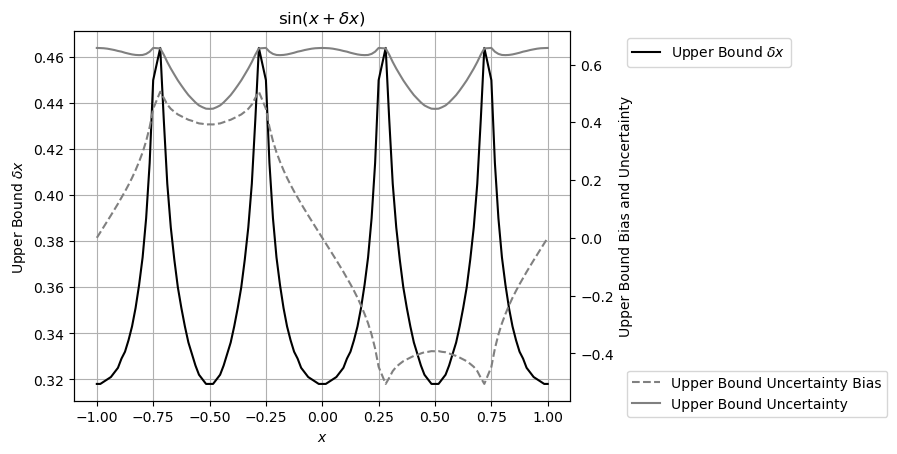

In [94]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

In [138]:
df = pd.read_csv("../Java/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.141593,1.0000,4.818606e-17,0.657520,Type.NotPositiveException
1,-3.043418,1.0024,3.870939e-02,0.656315,Type.NotPositiveException
2,-2.945243,1.0101,7.795708e-02,0.652878,Type.NotPositiveException
3,-2.847068,1.0238,1.184076e-01,0.647581,Type.NotPositiveException
4,-2.748894,1.0459,1.612205e-01,0.641326,Type.NotPositiveException


In [139]:
df['Edge Value'] /= math.pi

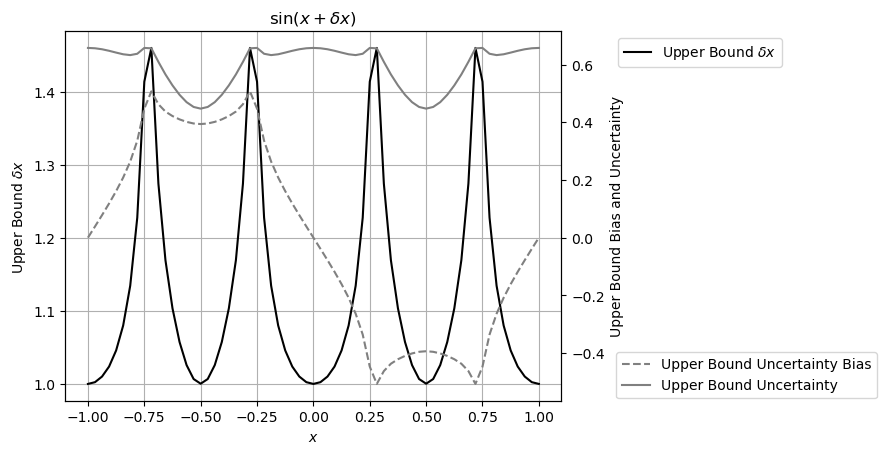

In [140]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.65,0.15))

In [152]:
df = pd.read_csv("../Cpp/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.14159,1.0000,4.818450e-17,0.657520,NotPositiveException
1,-3.04342,1.0024,3.870940e-02,0.656315,NotPositiveException
2,-2.94524,1.0101,7.795710e-02,0.652878,NotPositiveException
3,-2.84707,1.0238,1.184080e-01,0.647581,NotPositiveException
4,-2.74889,1.0459,1.612210e-01,0.641326,NotPositiveException


In [153]:
df['Edge Value'] /= math.pi

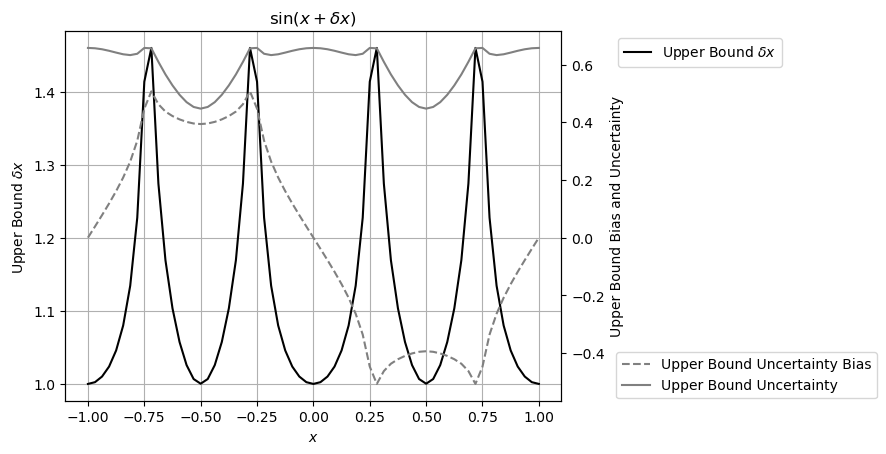

In [154]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.65,0.15))

# Power

## Square

In [160]:
df = pd.read_csv("../Python/Output/SquareAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2.000000,1,0.2,1.039999,0.403976,1.040205,0.405078,0.000509,1.002727,0,...,0.032920,0.026167,0.020632,0.015992,0.012168,0.009611,0.006169,0.004760,0.003221,0.001278
1,1.999999,1,0.2,1.039999,0.403976,1.041978,0.404220,0.004897,1.000605,0,...,0.033499,0.026697,0.020679,0.015718,0.011914,0.008926,0.006662,0.004438,0.003442,0.001499
2,2.000001,1,0.2,1.039999,0.403977,1.041134,0.404230,0.002809,1.000628,0,...,0.033861,0.026233,0.021182,0.015647,0.011864,0.008775,0.006178,0.004941,0.003472,0.001540


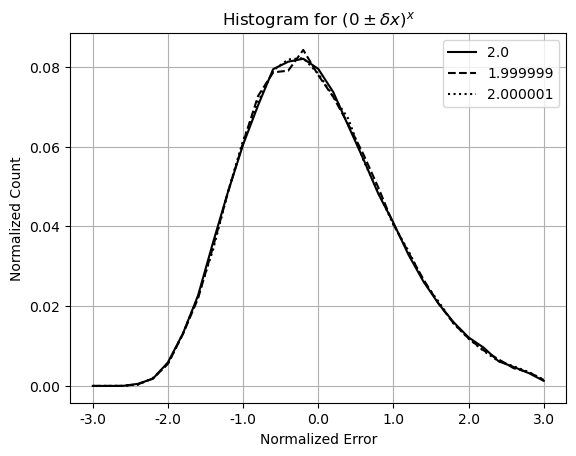

In [161]:
PlotHistoByExp(topic=r'$(0 \pm \delta x)^x$', sExp={2.0: 'k', 1.999999: 'k--', 2.000001: 'k:'})

In [162]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,-0.2,0.2,0.079999,0.097976,0.079585,0.097471,-0.004231,0.994847,0,...,0.021123,0.017614,0.014575,0.011994,0.010342,0.008384,0.006997,0.006048,0.004651,0.002060
1,2,-0.1,0.2,0.049999,0.069277,0.049604,0.069020,-0.005700,0.996287,0,...,0.018503,0.014782,0.013044,0.010284,0.008955,0.007268,0.006205,0.005295,0.004508,0.001983
2,2,0.0,0.2,0.039999,0.056563,0.040135,0.056970,0.002396,1.007196,0,...,0.017933,0.015549,0.012061,0.010260,0.008603,0.007365,0.006373,0.004849,0.004184,0.002066
3,2,0.1,0.2,0.049999,0.069277,0.050093,0.069135,0.001357,0.997938,0,...,0.018002,0.015816,0.014079,0.010902,0.009522,0.007612,0.006345,0.005160,0.004342,0.002054
4,2,0.2,0.2,0.079999,0.097976,0.080303,0.097574,0.003099,0.995895,0,...,0.021796,0.017798,0.015911,0.012505,0.009608,0.008578,0.006772,0.005957,0.004916,0.002020


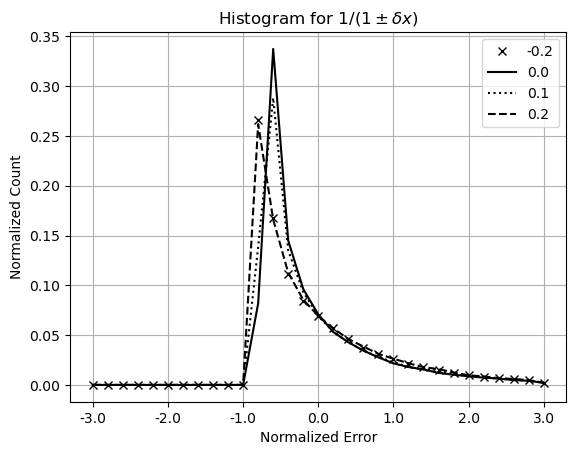

In [163]:
PlotHistoByX(topic=r'$1/(1 \pm \delta x)$', sX={0: 'k', 0.2: 'k--', 0.1: 'k:', -0.2: 'kx'})

## Inversion

In [164]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.2000,1.046250,0.254741,1.045394,0.247734,-0.003361,0.972495,0,...,0.024737,0.018391,0.014342,0.011245,0.007976,0.006539,0.005172,0.003917,0.003219,0.001194
1,-1,1,0.1000,1.010316,0.104291,1.009841,0.104027,-0.004555,0.997469,0,...,0.031718,0.024377,0.019474,0.015214,0.011348,0.008750,0.006152,0.004692,0.003393,0.001400
2,-1,1,0.0100,1.000100,0.010004,1.000066,0.009999,-0.003423,0.999476,94,...,0.038425,0.030072,0.022241,0.015513,0.010689,0.006819,0.004603,0.003008,0.001845,0.000552
3,-1,1,0.0010,1.000001,0.001000,1.000005,0.001004,0.004294,1.003983,121,...,0.038760,0.030549,0.022328,0.016262,0.011560,0.007459,0.005013,0.002928,0.001775,0.000401
4,-1,1,0.0001,1.000000,0.000100,1.000000,0.000100,-0.002002,0.999749,153,...,0.040003,0.029514,0.022253,0.015404,0.011001,0.007120,0.003991,0.002988,0.001875,0.000542


In [165]:
df['Input Uncertainty'].unique()

array([2.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04])

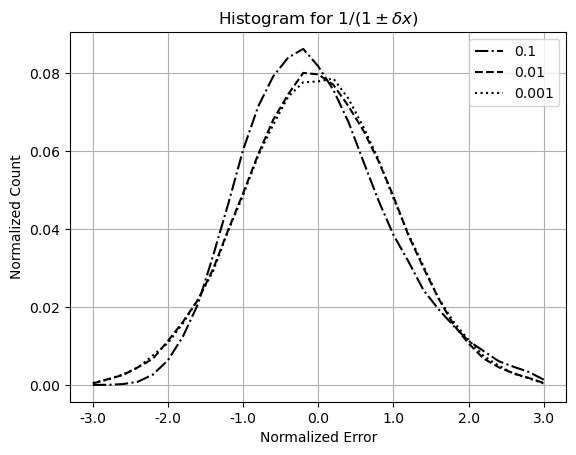

In [166]:
PlotHistoByUncertainty(topic=r'$1/(1 \pm \delta x)$', sInput={0.199802: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

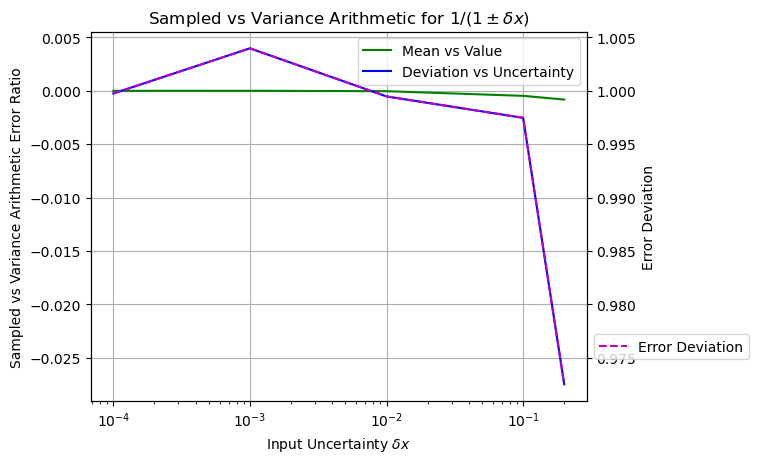

In [167]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [168]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.2011,0.994728,0.102551,0.994816,0.102352,0.000865,0.998063,452,...,0.042876,0.032768,0.021956,0.014480,0.008561,0.004954,0.002763,0.001306,0.000683,0.000151
1,0.5,1,0.1000,0.998738,0.050224,0.998948,0.050322,0.004178,1.001958,254,...,0.042116,0.030980,0.022563,0.015691,0.010384,0.006401,0.004063,0.002027,0.001244,0.000281
2,0.5,1,0.0100,0.999987,0.005000,0.999981,0.005000,-0.001352,1.000020,142,...,0.038389,0.029604,0.023086,0.016176,0.010650,0.006980,0.004403,0.002758,0.001574,0.000381
3,0.5,1,0.0010,1.000000,0.000500,1.000002,0.000502,0.003866,1.003644,150,...,0.040007,0.030401,0.022330,0.016574,0.011571,0.007109,0.004833,0.002878,0.001674,0.000451


In [169]:
df['Input Uncertainty'].unique()

array([0.2011, 0.1   , 0.01  , 0.001 ])

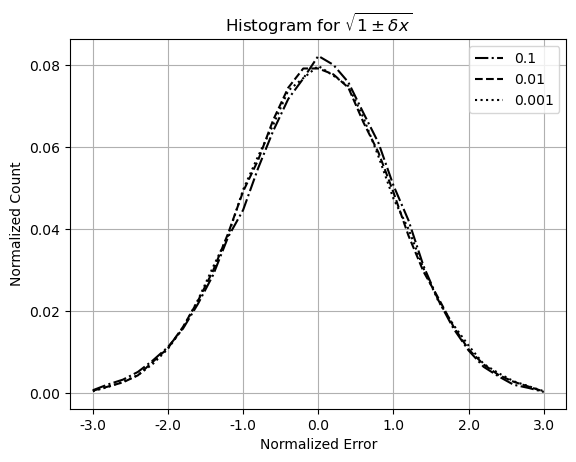

In [170]:
PlotHistoByUncertainty(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.20189: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

# Natural Power

In [171]:
df = pd.read_csv("../Python/Output/NaturalAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0.0,0.2,0.039999,0.056563,0.039658,0.056001,-0.006042,0.990060,0,...,0.017959,0.015495,0.012266,0.010150,0.008545,0.007022,0.005816,0.005223,0.004150,0.001595
1,2,0.2,0.2,0.079999,0.097976,0.080237,0.098074,0.002427,1.000998,0,...,0.021832,0.018392,0.014769,0.012023,0.009717,0.008717,0.006696,0.006236,0.004930,0.002001
2,3,0.0,0.2,0.000000,0.030972,-0.000107,0.030695,-0.003457,0.991041,1117,...,0.009243,0.007679,0.005706,0.004755,0.003906,0.003323,0.002699,0.002086,0.001708,0.000808
3,3,0.2,0.2,0.032000,0.061959,0.032044,0.062526,0.000721,1.009157,12,...,0.014568,0.011642,0.010036,0.008338,0.006885,0.005637,0.005044,0.004839,0.003530,0.001381
4,3,-0.2,0.2,-0.032000,0.061959,-0.032126,0.062195,-0.002034,1.003815,2260,...,0.001862,0.000860,0.000450,0.000246,0.000113,0.000174,0.000051,0.000010,0.000020,0.000041


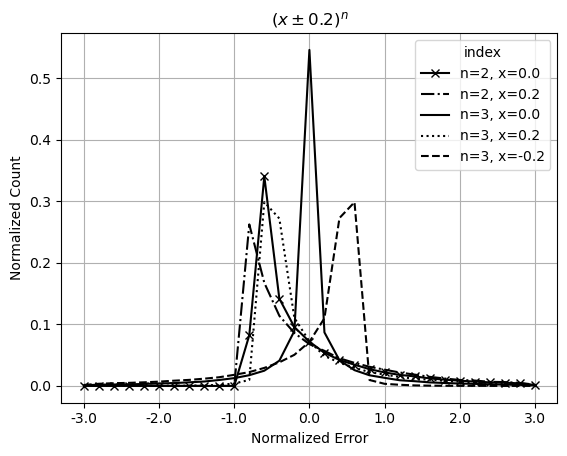

In [172]:
df['index'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df.set_index('index')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            style=['k-x', 'k-.', 'k-', 'k:', 'k--'])

## Expansion

In [173]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
0,power,-1,1.0,0.19,2,1.000000,0.000000,3.610000e-02,1.604942e-35,0.036099,3.759893e-35,0.036099,1.618180e-35
1,power,-1,1.0,0.19,4,1.036099,0.036099,1.303210e-03,4.183152e-38,0.003909,1.131336e-36,0.010424,2.738582e-36
2,power,-1,1.0,0.19,6,1.040009,0.046524,4.704588e-05,8.177288e-41,0.000705,5.928567e-38,0.003244,2.596625e-37
3,power,-1,1.0,0.19,8,1.040714,0.049767,1.698356e-06,1.420896e-43,0.000178,5.198850e-39,0.001179,3.298049e-38
4,power,-1,1.0,0.19,10,1.040892,0.050946,6.131066e-08,2.314658e-46,0.000057,6.914483e-40,0.000499,5.753926e-39


In [174]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
710,power,-1,1.0,0.201,102,1.046796,0.063580,8.433306e-72,3.566489e-173,3.929510e-07,3.339872e-43,0.000040,3.347753e-41
711,power,-1,1.0,0.201,104,1.046796,0.063620,3.407140e-73,5.935513e-176,3.893753e-07,3.344159e-43,0.000040,3.418931e-41
712,power,-1,1.0,0.201,106,1.046797,0.063660,1.376519e-74,9.874499e-179,3.860582e-07,3.351115e-43,0.000040,3.493064e-41
713,power,-1,1.0,0.201,108,1.046797,0.063700,5.561273e-76,1.642166e-181,3.829828e-07,3.360618e-43,0.000041,3.570180e-41
714,power,-1,1.0,0.201,110,1.046797,0.063741,2.246810e-77,2.730048e-184,3.801341e-07,3.372560e-43,0.000041,3.650317e-41
715,power,-1,1.0,0.201,112,1.046798,0.063783,9.077336e-79,4.537116e-187,3.774981e-07,3.386847e-43,0.000042,3.733517e-41
716,power,-1,1.0,0.201,114,1.046798,0.063825,3.667335e-80,7.537910e-190,3.750623e-07,3.403394e-43,0.000042,3.819825e-41
717,power,-1,1.0,0.201,116,1.046798,0.063867,1.481640e-81,1.251954e-192,3.728151e-07,3.422129e-43,0.000043,3.909293e-41
718,power,-1,1.0,0.201,118,1.046799,0.063910,5.985973e-83,2.078723e-195,3.707460e-07,3.442986e-43,0.000043,4.001979e-41
719,power,-1,1.0,0.201,120,1.046799,0.063953,2.418393e-84,3.450484e-198,3.688453e-07,3.465910e-43,0.000044,4.097941e-41


In [175]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


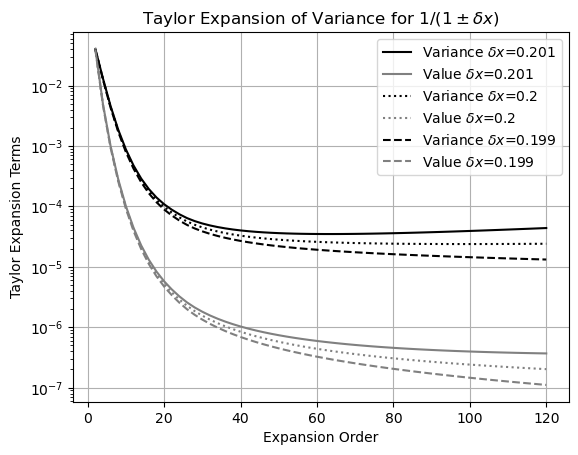

In [176]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Imprecise

In [177]:
df = pd.read_csv("../Python/Output/InversionAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,0.00,0.199803,0.046137,0.251280,NotMonotonicException: _imprecise_coeff for 1....
1,0.01,0.199803,0.046137,0.251512,NotMonotonicException: _imprecise_coeff for 1....
2,0.02,0.199803,0.046137,0.252203,NotMonotonicException: _imprecise_coeff for 1....
3,0.03,0.199803,0.046137,0.253350,NotMonotonicException: _imprecise_coeff for 1....
4,0.04,0.199803,0.046137,0.254947,NotMonotonicException: _imprecise_coeff for 1....


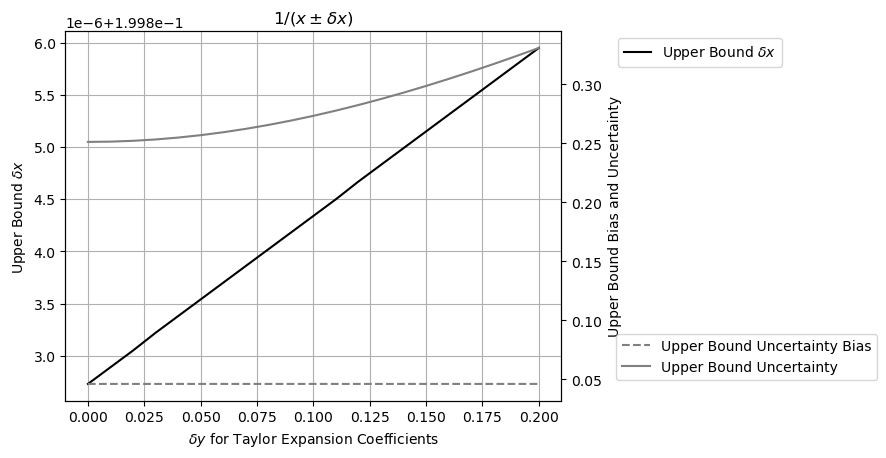

In [178]:
PlotEdge(topic=r'$1/(x \pm \delta x)$', xLabel=r'$\delta y$ for Taylor Expansion Coefficients',  rightLegend=(1.65,0.2))